proyecto 1 Andres Carrasquilla- Santiago Gomez -David Zamora BI

# Entendimiento del negocio y enfoque analítico


Problema negocio: UNFPA es el fondo de poblaciones de las naciones unidas y en este momento buscan realizar un proceso conjunto que ayude a identificar problemas y evaluar soluciones. Especificamente el proyecto a desarrollar necesita desarrollar un modelo que logre relacionar la información dada por diferentes ciudadanos con los ODSs 3 4 y 5 automáticamente.

Después de explorar los datos y ver lo que el UNFPA quiere, proponemos el siguiente enfoque analítico para resolver el problema

Objetivos:
* Desarrollar un modelo analítico que automatice la relación entre las opiniones de los ciudadanos y los Objetivos de Desarrollo Sostenible (ODS) 3, 4 y 5. Tener en cuenta que la automatización para que sea posible el uso de ese modelo por gente externa a nuestra organizacion (quienes vamos a desarrollar el modeo) hace falta la parte 2 de la entrega.

* Optimización del análisis de texto. Al desarrollar este proyecto, UNFPA puede lograr disminuir los tiempos y los costos relacionados con el analisis de texto. Eso es porque gran parte del trabajo lo hará el modelo desarrollado, disminuyendo la cantidad de horas de personal dedicado a eso.

* Aumento de la participacion ciudadana

Criterios de exito
* Se debe ver una reducción en el tiempo de clasificación de opiniones para los trabajadores como mínimo del 50% en relacion al analisis manual. (Tener en cuenta que se hace hipoteticamente y no podemos medir realmente cuanto ahorrarian)
*   El valor de precision para cada clase para las clasificaciones generadas por el modelo sobre los datos de prueba deben ser mayores a 0.7
* El valor del recall para cada clase sobre el conjunto de prueba debe ser mayor a 0.8. Esto significa que el modelo debe clasificar correctamente al menos el 80% de las opiniones  reales que pertenecen a cada clase.
* El f1 score para cada clase debe ser al menos 0.75, para encontrar un balance entre precision y recall en el modelo.
* Al facilitar el acceso a todos a esta herramienta se puede mejorar l aparticipación ciudadana, obteniendo un 20% más de opiniones que en periodos anteriores o en estimados de numeros de opiniones sin esta herramienta.

La organización que se beneficiaria con este proyecto es la misma que lo está proponiendo, UNFPA.

Dentro de el UNFPA se beneficiarian los roles:
* Analista de politicas publicas: Estas personas utilizarán los datos que salgan clasificados por el modelo para poder tomar desiciones referentes a politicas públicas para mejorar el desarrollo sostenible
* Los investigadores podrán crear reportes con los resultados obtenidos por el modelo. De esta forma, esos reportes podrán tener un impacto social, y podrán encontrar más facilmente los problemas relacionados a cada ODS


En Colombia este proyecto tendria un impacto positivo por diferentes motivos:

* Politicas publicas: Al tener una herramienta que facilite el proceso de clasificación, se podrán tomar respuestas más agiles y eficientes para problemas relacionados con esos 3 ODS.
* Impacto social: al aumentar la participación ciudadana, es probable que más personas den su opinión y por tanto se sientan representados cuando se tomen nuevas politicas. De esa forma, personas que antes no hubieran encontrado solución a su problema, ahora si la encuentren.



* Tipo de Aprendizaje: Supervisado
* Tarea de aprendizaje: Clasificación multiclase
* Técnicas y algoritmos a utilizar:
    Preprocesamiento: Tokenización, Lematización, Eliminacion de stopwords, BoW
    Para el modelo: Arbol de desicion, KNN, Random forest.


Por ultimo se va a usar un analisis descriptivo y predictivo. El primero se usará porque se necesita entender las opiniones ciudadanas relacionadas con cada uno de los ODS y el segundo porque se construye un modelo de clasificación a partir de machine learning que permita relacionar nuevas opiniones con ods 3, 4 y 5.






# Entendimiento de datos

Librerias

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM,  Conv1D, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tqdm import tqdm
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix



Lo primero que haremos será cargar el set de datos.

In [36]:
train = pd.read_excel('ODScat_345.xlsx')
train.head()


,Textos_espanol,sdg
0,"Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.",3
1,"En 2007, el gobierno central financió directamente solo el 0,3% del gasto total en salud, pero realizó transferencias específicas para el gasto en salud que ascendieron a otro 5,6% del gasto total. La mayor parte del gasto presupuestario en salud lo realizan los gobiernos de los condados. Por lo tanto, los condados pobres solo pueden ofrecer un bajo nivel de atención a la población local. El gobierno provincial proporciona subsidios del lado de la oferta a los hospitales.",3
2,"Claramente, hay muchos otros factores en juego, en particular, una variedad de barreras y determinantes sociales. Estos pueden estar relacionados con el género, la clase, la etnia, la casta, el idioma y la religión, y surgen de estructuras, normas y procesos sociales arraigados que aceptan e incluso fomentan distribuciones injustas de la riqueza y los recursos sociales. Por ejemplo, las personas que viven con el VIH y algunas otras enfermedades crónicas enfrentan altos niveles de estigma y discriminación que dificultan su acceso a pruebas médicas, tratamiento, atención y apoyo. Por lo tanto, los gobiernos que buscan mejorar los estándares de salud querrán mejorar la condición de la mujer, brindar servicios de salud reproductiva efectivos, implementar programas integrales de lactancia materna en línea con las recomendaciones actuales y aumentar las presiones comunitarias contra el aborto selectivo por sexo. Las personas pobres, que carecen de educación e información, o de fondos para opciones más saludables, son más vulnerables al impacto de las ENT que los ricos y es probable que mueran antes. Directa e indirectamente, las ENT tendrán impactos de gran alcance en el progreso hacia los ODM.",3
3,"Por ejemplo, el estado australiano de Victoria creó una agencia de promoción de la salud financiada con los impuestos sobre el tabaco, y varios estados de EE.UU. (California, Massachusetts, Arizona y Oregón) han destinado parte de los ingresos procedentes de los impuestos especiales sobre el tabaco a actividades de educación y control del tabaco, mientras que en Nueva Jersey, Ohio y Texas los ingresos procedentes del alcohol se utilizan para programas de educación y prevención relacionados con el alcohol (Sassi et al., 2004), Los impuestos locales pueden ser una fuente importante de ingresos, sobre todo en los sistemas sanitarios descentralizados (por ejemplo, Dinamarca, Finlandia, Italia y Suecia)17 . Además, el nivel de los impuestos locales puede fijarse en función de las preferencias locales sobre el nivel y la calidad de los servicios médicos. Sin embargo, en ausencia de un mecanismo de transferencia ajustado al riesgo y gestionado centralmente, la descentralización reduce la mancomunación de riesgos y podría dar lugar a mayores disparidades sanitarias interregionales.",3
4,"El consumo anual de alcohol se estima en 15,7 litros al año para los hombres, más de un 50% por encima de la media de la OCDE (10,4) (Sistema mundial de información sobre alcohol y salud de la OMS), lo que puede ayudar a explicar la

In [37]:
train.dtypes

Textos_espanol    object
sdg                int64
dtype: object

vemos que el data set trae dos columnas, una de texto y una numérica. La columa de texto representa las opiniones de los ciudadanos y la segunda columna,SDG representa a que categoria (de los ods 3, 4 o 5) pertenece cada uno de las opiniones

## Entendimiento de la columna SDG

Esta es una variable categorica que se representa con numeros y que funciona como etiqueta. Esta sera la columna que se pretende predecir a partir de opiniones. Dicho de otra manera, el modelo usara opiniones en texto para clasificarlas en las 3 clases que SDG representa

### Validez

veamos la descripción de la columna SDG

In [38]:
train.describe()

,sdg
count,4049.000000
mean,4.051124
std,0.814338
min,3.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


vemos que la descripción coincide con nuestros supuestos, que decian que cada valor de sdg corresponde a una categoria ODS. Esto porque los valores se mueven entre 3 y 5 y no hay valores fuera de este rango. Eso significa que esta columna cumple con el atributo de calidad VALIDEZ



### Completitud

In [39]:
train.shape

(4049, 2)

además, vemos que el numero de valores en la columna de sdg es igual al numero de filas en train.shape, lo que significa que no hay valores nulos en la etiqueta. Cumple con completitud esta columna

### Consistencia

In [40]:
train['sdg'].value_counts()

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64

no hay problemas de consistencia, cada categoria se representa con un numero. No hay problemas que se muestre por ejemplo una categoria con 3 y otra con 'tres'.

### Unicidad

En cuanto a la unicidad, esta columna no necesita cumplir con ese atributo. Esto pasa porque al representar categorias, es muy probable que muchas opiniones se clasifiquen en cada categoria

## Entendimiento columna Texto_espanol

Esta columna representa las opiniones de los ciudadanos, aquellas que se intentaran clasificar en las clases de los ODS 3 4 y 5 que estan en la columna SDG

### Consistencia

In [41]:
train['Textos_espanol'].dtype

dtype('O')

podemos ver que es de tipo objeto. Esto concuerda con el supuesto que los valores son cadenas de texto. En cuanto a consistencia, podriamos tambien querer revisar que diferentes palabras con mismo significado se escriban igual. Es probable que esto pase durante las opiniones de las personas, por lo que estaremos usando un lematizador para eso. Preferimos usar un lematizador y no stemming porque el stemming borra mas informacion de la palabra y puede dar resultados mas imprecisos a pesar de ser mas rapido. El lematizador lo que hace es transformar todas esas diferentes palabras con un mismo significado a su forma base. El stemming lo que hace es reducir la palabra a la raiz, pero deja menos info.

Ejemplo lematizar:
"corriendo" → "correr"
"amigos" → "amigo"

Ejemplos stemming
"corriendo" → "corr"
"amigos" → "amig"

### Completitud

In [42]:
len(train['Textos_espanol'])

4049

podemos ver que tiene valores en cada una de las filas y concuerda con el numero de ejemplos de datos de entrenamiento en el df. Sin embargo, esto no es suficiente para asegurar la completitud. Para hacer eso necesitamos saber que no hayan valores donde hayan opiniones vacias ''

In [43]:
train[train['Textos_espanol'].isnull() | (train['Textos_espanol'] == '')]

,Textos_espanol,sdg


A pesar que vemos que no hay filas que cumplan con esto, aun podria pasar que hayan opiniones que se compongan de tokens que no sean validos. Sin embargo, revisaremos esto mas adelante en el preparamiento de los datos. Esta decision la tomamos porque necesitamos hacer uso de un tokenizador. El enfoque sera el siguiente. Primero tokenizamos, borramos los stop words y adicionalmente en ese punto borrariamos las palabras que no se compongan de letras y caracteres alfabeticos y no correspondan a puntuacion. En ese punto volvemos a verificar la completitud.

### Validez

Proponemos revisar los siguientes puntos para la validez:
1. Encontrar caracteres no validos
2. Pueden haber opiniones con palabras repetidas como a a a a o y y y... de ese estilo.
3. Puede haber opiniones muy cortas que no nos den informacion suficiente.
4. Pueden haber palabras no validas en espaniol (esto se hara luego de la tokenizacion)


#### Identificacion de caracteres no validos

In [44]:
def has_invalid_chars(text):
    return bool(re.search(r'[^a-zA-ZáéíóúüñÁÉÍÓÚÜÑ\s,.;:()0-9%]', text))


train['has_invalid_chars'] = train['Textos_espanol'].apply(has_invalid_chars)
invalid_char_count = train['has_invalid_chars'].sum()
print(f"Opiniones con caracteres no válidos: {invalid_char_count}")


Opiniones con caracteres no válidos: 1571


Es muy raro que tantas opiniones tengan caracteres no validos. Miremos mejor a que se debe eso y cuales las palabras con esos caracteres

In [45]:

# Función que extrae las palabras con caracteres no válidos
def get_invalid_words(text):
    words_with_invalid_chars = [word for word in text.split() if has_invalid_chars(word)]
    return words_with_invalid_chars

train['invalid_words'] = train['Textos_espanol'].apply(get_invalid_words)

# Mostrar opiniones con caracteres no válidos
opiniones_invalidas = train[train['has_invalid_chars']]

# Configurar pandas para que no recorte el texto largo
pd.set_option('display.max_colwidth', None)

# Imprimir opiniones completas y las palabras no válidas
for index, row in opiniones_invalidas.iterrows():
    print(f"Opinión completa:\n{row['Textos_espanol']}")
    print(f"Palabras con caracteres no válidos:\n{row['invalid_words']}\n")


Opinión completa:
Por ejemplo, el nÃºmero de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparaciÃ³n con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la poblaciÃ³n ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El nÃºmero de recetas que no pudieron ser surtidas en su totalidad por un farmacÃ©utico debido a la falta de existencias es de 33% dentro del SP en comparaciÃ³n con 14% dentro del IMSS segÃºn los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas mÃ¡s altas de recetas surtidas). Ambas cifras se encuentran entre las mÃ¡s altas de la OCDE. El gasto de bolsillo no se ha reducido significativamente en la última década, a pesar de los esfuerzos para lograr la cobertura sanitaria universal a través de la reforma del SP.
Palabras con caracteres no válidos:
[

A pesar que mas de la mitad de las opiniones tienen caracteres no validos, no significa que no funcionen. De la informacion que encontramos en la celda anterior, podemos ver que muchos caracteres no validos por vocales con tilde que no se codificaron bien. Al revisar el xslx que se nos entrego esos errores ya venian. Otros problemas que se ven son numeros que separan decimales con punto, o el signo porcentaje. Otro problema que se ve esque los rangos con guion salen como no validos.

Ahora revisemos el 2, que es que pueden haber opiniones con palabras repetidas sucesivametne

In [46]:
# Modificación de la función para detectar palabras consecutivas repetidas
def palabras_consecutivas_repetidas(texto):
    palabras = texto.split()
    return any(palabras[i] == palabras[i+1] for i in range(len(palabras) - 1))


train['Palabras_Consecutivas_Repetidas'] = train['Textos_espanol'].apply(palabras_consecutivas_repetidas)

# Ver cuántas opiniones tienen palabras consecutivas repetidas
resultados_consecutivos = train['Palabras_Consecutivas_Repetidas'].value_counts()
print(resultados_consecutivos)


Palabras_Consecutivas_Repetidas
False    4038
True       11
Name: count, dtype: int64


Esto solo ocurre en 11 filas y se arregla muy facil borrando los repetidos

3ro pueden haber opiniones muy cortas. Para verificar esto, podemos hacer una tokenizacion inicial y miramos como se distribuyen las opiniones en longitud por palabras. Tener en cuenta que un texto vacio seria verificar completitud, pero que una opinion tenga 5 palabras y no sea suficiente lo podriamos pasar por validez

In [47]:
import nltk
nltk.download('punkt')

train['tokenized_text'] = train['Textos_espanol'].apply(nltk.word_tokenize)

print(train['tokenized_text'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0                                                                            [Por, ejemplo, ,, el, nÃºmero, de, consultas, externas, de, especialistas, es, de, 319, por, cada, mil, derechohabientes, en, el, SP, ,, en, comparaciÃ³n, con, 338, y, 620, por, cada, mil, derechohabientes, en, el, IMSS, y, el, ISSSTE, ,, respectivamente, ., Si, bien, algunas, de, estas, diferencias, pueden, reflejar, una, necesidad, desigual, (, como, la, poblaciÃ³n, ligeramente, mayor, del, ISSSTE, ), ,, otras, no, pueden, justificarse, de, esta, manera, ., El, nÃºmero, de, recetas, que, no, pudieron, ser, surtidas, en, su, totalidad, por, un, farmacÃ©utico, debido, a, la, falta, de, existencias, es, de, 33, %, dentro, del, SP, en, comparaciÃ³n, con, ...]
1                                                                                                                                                                        [En, 2007, ,, el, gobierno, central, financió, directamente, solo, el, 0,3, %, del, gast

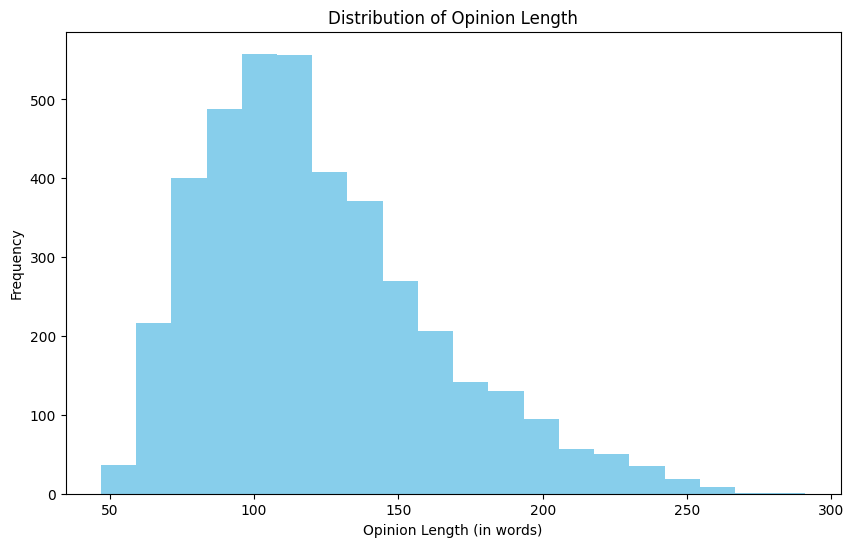

In [48]:
train['opinion_length'] = train['tokenized_text'].apply(len)


plt.figure(figsize=(10, 6))
plt.hist(train['opinion_length'], bins=20, color='skyblue')
plt.xlabel('Opinion Length (in words)')
plt.ylabel('Frequency')
plt.title('Distribution of Opinion Length')
plt.show()

In [49]:
min_length = train['opinion_length'].min()
max_length = train['opinion_length'].max()

print(f"Range of word lengths in Spanish texts: {min_length} - {max_length}")

Range of word lengths in Spanish texts: 47 - 291


En realidad a ninguna opinion le pasa que tenga pocas palabras. De hecho la mas corta tiene 47, que en realidad esta bastate bien.

### Unicidad

Ninguna opinion deberia estar dos veces en el conjunto de datos

In [50]:
duplicates = train[train.duplicated(subset='Textos_espanol')]
if duplicates.empty:
    print("No duplicate Spanish texts found.")
else:
    print("Duplicate Spanish texts found.")
    print(duplicates['Textos_espanol'])

No duplicate Spanish texts found.


No hay probelmas de unicidad en el set de datos

# Preparacion de datos

Una vez realizado el entendimiento podemos determinar que los principales probelmas a corregir son:
1. La consistencia, puede pasar que palabras diferentes tengan un mismo significado. Para esto debemos lematizar
2. Validez. Vimos que pueden haber formas de escribir palabras que no son validas, o pueden haber palabras repetidas consecutivamente. Para esto intentaremos corregir los erroes mas comunes. Por ejemplo las vocales con tildes la mala codigicacion las vuelve caracteres extranios.

Seguido de esto, haremos la preparacion para poder pasar los datos a los modelos. Especificamente haremos tokenizado, lematizado, eliminacion de stop words y luego TF IDF y n grams. Estos dos ultimos se haran por separado, logicamente no se puede hacer los dos al tiempo, entonces en una variable dejaremos td idf y en otra n grams.

In [51]:
def corregir_caracteres(texto):
    correcciones = {
        'Ãº': 'ú',
        'ãº': 'ú',
        'Ã³': 'ó',
        'Ã©': 'é',
        'Ã±': 'ñ',
        'Ã¡': 'á',
        'Ã­': 'í'
    }
    errores_originales = sum(texto.count(incorrecto) for incorrecto in correcciones)
    for incorrecto, correcto in correcciones.items():
        texto = texto.replace(incorrecto, correcto)
    return texto, errores_originales


train['Textos_espanol'], train['Errores_Originales'] = zip(*train['Textos_espanol'].apply(corregir_caracteres))
errores_totales = train['Errores_Originales'].sum()
print('Total de errores corregidos:', errores_totales)
print(train['Textos_espanol'].head())


Total de errores corregidos: 2299
0                                                                                                                                                                                                                                                                                    Por ejemplo, el número de consultas externas de especialistas es de 319 por cada mil derechohabientes en el SP, en comparación con 338 y 620 por cada mil derechohabientes en el IMSS y el ISSSTE, respectivamente. Si bien algunas de estas diferencias pueden reflejar una necesidad desigual (como la población ligeramente mayor del ISSSTE), otras no pueden justificarse de esta manera. El número de recetas que no pudieron ser surtidas en su totalidad por un farmacéutico debido a la falta de existencias es de 33% dentro del SP en comparación con 14% dentro del IMSS según los datos de la encuesta (aunque las propias cifras de los institutos de la SS sugieren tasas más altas de recetas sur

Ya logramos corregir 2299 errores donde habian errores de codificacion de caracteres latinos

In [52]:
def eliminar_consecutivas(texto):
    palabras = texto.split()
    palabras_filtradas = [palabra for i, palabra in enumerate(palabras) if i == 0 or palabra != palabras[i - 1]]
    correcciones = len(palabras) - len(palabras_filtradas)
    texto_corregido = ' '.join(palabras_filtradas)
    return texto_corregido, correcciones

train['Textos_espanol'], train['Correcciones'] = zip(*train['Textos_espanol'].apply(eliminar_consecutivas))
total_correcciones = train['Correcciones'].sum()
print('Total de correcciones:', total_correcciones)


Total de correcciones: 11


Eliminamos 11 palabras que estaban escritas consecutivamente

In [53]:
def ajustar_texto(texto):
    texto = texto.replace('%', ' porcentaje')
    texto = re.sub(r'(\d+)[.,](\d+)', lambda x: str(round(float(x.group().replace(',', '.')))), texto)

    return texto

train['Textos_espanol'] = train['Textos_espanol'].apply(ajustar_texto)



Los simbolos % los convertimos en porcentaje y los numeros decimales los aproximamos a un numero. Ahora que ya corregimos los errores principales podemos tokenizar y lematizar.



## Tokenizacion y eliminacion de stop words

Las stop words son las palabras que no suelen tener un significado sino que son conectoras. Palabras como y, de , el, la... Esas palabras no aportan informacion relevante para nuestro modelo, asi que es mejor eliminarlas

In [54]:


nltk.download('punkt')
nltk.download('stopwords')

# Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

def procesar_texto(texto):
    # Tokenización
    tokens = word_tokenize(texto, language='spanish')

    # Eliminación de stopwords
    tokens_sin_stopwords = [token for token in tokens if token.lower() not in stop_words]

    return tokens_sin_stopwords

# Aplicar la función a cada elemento de la columna 'Textos_espanol'
train['Tokens'] = train['Textos_espanol'].apply(procesar_texto)
print(train['Tokens'].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USUARIO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0                                                              [ejemplo, ,, número, consultas, externas, especialistas, 319, cada, mil, derechohabientes, SP, ,, comparación, 338, 620, cada, mil, derechohabientes, IMSS, ISSSTE, ,, respectivamente, ., Si, bien, diferencias, pueden, reflejar, necesidad, desigual, (, población, ligeramente, mayor, ISSSTE, ), ,, pueden, justificarse, manera, ., número, recetas, pudieron, ser, surtidas, totalidad, farmacéutico, debido, falta, existencias, 33, porcentaje, dentro, SP, comparación, 14, porcentaje, dentro, IMSS, según, datos, encuesta, (, aunque, propias, cifras, institutos, SS, sugieren, tasas, altas, recetas, surtidas, ), ., Ambas, cifras, encuentran, altas, OCDE, ., gasto, bolsillo, reducido, significativamente, última, década, ,, pesar, esfuerzos, lograr, cobertura, sanitaria, universal, través, reforma, SP, .]
1                                                                                                                                   

## Lematizacion

Lematizar convierte las palabras en su forma base, no cortandolas a la raiz como lo haria stemming. Por ejemplo corriendo lo deja como correr.

In [55]:

!python -m spacy download es_core_news_sm

nlp = spacy.load('es_core_news_sm')

def lematizar_tokens(tokens):
    doc = spacy.tokens.Doc(nlp.vocab, words=tokens)
    lemmas = [token.lemma_ for token in nlp(doc)]
    return lemmas

train['Lemas'] = train['Tokens'].apply(lematizar_tokens)
print(train['Lemas'].head())

     ---------------------------------------- 0.0/12.9 MB ? eta -:--:--
     --------------------------------------- 0.0/12.9 MB 320.0 kB/s eta 0:00:41
      --------------------------------------- 0.2/12.9 MB 2.0 MB/s eta 0:00:07
     -- ------------------------------------- 0.6/12.9 MB 4.5 MB/s eta 0:00:03
     --- ------------------------------------ 1.2/12.9 MB 6.3 MB/s eta 0:00:02
     ----- ---------------------------------- 1.9/12.9 MB 8.0 MB/s eta 0:00:02
     -------- ------------------------------- 2.6/12.9 MB 9.3 MB/s eta 0:00:02
     ---------- ----------------------------- 3.2/12.9 MB 10.3 MB/s eta 0:00:01
     ------------ --------------------------- 4.0/12.9 MB 10.6 MB/s eta 0:00:01
     --------------- ------------------------ 4.9/12.9 MB 11.6 MB/s eta 0:00:01
     ----------------- ---------------------- 5.7/12.9 MB 12.1 MB/s eta 0:00:01
     -------------------- ------------------- 6.7/12.9 MB 13.0 MB/s eta 0:00:01
     ----------------------- ---------------- 7.7/12.


[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: C:\Users\USUARIO\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


0                                           [ejemplo, ,, número, consulta, externo, especialista, 319, cada, mil, derechohabient, SP, ,, comparación, 338, 620, cada, mil, derechohabiente, IMSS, ISSSTE, ,, respectivamente, ., si, bien, diferencia, poder, reflejar, necesidad, desigual, (, población, ligeramente, mayor, ISSSTE, ), ,, poder, justificar él, manera, ., número, receta, poder, ser, surtir, totalidad, farmacéutico, debido, faltar, existencia, 33, porcentaje, dentro, SP, comparación, 14, porcentaje, dentro, IMSS, según, dato, encuesta, (, aunque, propio, cifra, instituto, SS, sugerir, tasa, alto, receta, surtida, ), ., ambos, cifra, encontrar, alto, OCDE, ., gasto, bolsillo, reducido, significativamente, último, décado, ,, pesar, esfuerzo, lograr, cobertura, sanitario, universal, través, reforma, SP, .]
1                                                                                                                                                                                 

## TF IDF y BoW con N-grams

Vamos a guardar las dos formas de representar las opiniones en variables diferentes. Asi se pueden probar los modelos con el que mas convenga o con los dos.

TF IDF da peso a las palabras dependiendo de cuan comunes son en un documento y a lo largo de muchos documentos. Su formula es ![image-2.png](attachment:image-2.png).
TF(t,d) es la frecuencia del término t en el documento d.
![image-3.png](attachment:image-3.png)

df(t) es el número de documentos que contienen el término t.



Un ejemplo de un texto codificado como tfidf seria "los coches eléctricos reducen la contaminación" ![image-4.png](attachment:image-4.png)


Recordar que esos valores que aparecen como w en la tabla deben ser calculados con la formula anterior


Ahora el texto codificado como BoW con n gramas de 3 seria


![image.png](attachment:image.png)





In [56]:
X_train, X_test, y_train, y_test = train_test_split(train['Lemas'].astype('str'), train['sdg'], test_size=0.3, random_state=42)

# BoW con n-gramas
vectorizer_bow = CountVectorizer(ngram_range=(1, 3))
X_train_bow = vectorizer_bow.fit_transform(X_train)
X_test_bow = vectorizer_bow.transform(X_test)

# TF-IDF con n-gramas
vectorizer_tfidf = TfidfVectorizer(ngram_range=(1, 3))
X_train_tfidf = vectorizer_tfidf.fit_transform(X_train)
X_test_tfidf = vectorizer_tfidf.transform(X_test)




In [57]:
X_train.shape

(2834,)

## Revision de balance de clases

In [58]:
class_balance = train['sdg'].value_counts()
print(class_balance)

sdg
5    1451
4    1354
3    1244
Name: count, dtype: int64


Podemos ver que las clases estan bien balanceadas, no hace falta upsampling

# Modelado

# Arbol de decision

Un arbol de decision es un algoritmo de clasificacion que funciona dividiendo en grupos el set de datos. El arbol encuentra en cada division la forma de disminuir el coeficiente de gini o la entropia. Estos ultimos dos son formas de expresar que tan puras son las clases, es decir, que tan bien separadas por clases estan los datos. Tiene los siguientes hiperparametros:

criterion: este hiperparámetro define la función para medir la calidad de una división. Los valores más comunes son "gini" para la impureza de Gini y "entropy" para la ganancia de información (entropía). Ambos son métodos para evaluar cómo de homogéneas son las clases en los conjuntos de datos producidos por las posibles divisiones.

max_depth: La profundidad máxima del árbol. Limitar la profundidad del árbol ayuda a prevenir el sobreajuste. Si no se especifica, los nodos se expanden hasta que todas las hojas sean puras o hasta que contengan menos muestras que min_samples_split.

min_samples_split: El número mínimo de muestras que un nodo debe tener antes de que pueda dividirse. Valores más altos evitan que el modelo se ajuste demasiado a los datos de entrenamiento.

min_samples_leaf: El número mínimo de muestras que debe tener una hoja. Una hoja es el nodo final de una decisión en el árbol. Este parámetro puede suavizar el modelo, especialmente en regresión.




In [59]:

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train_tfidf, y_train)

y_train_pred = dt_model.predict(X_train_tfidf)
y_test_pred = dt_model.predict(X_test_tfidf)


print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))




Training Accuracy: 0.8902611150317572
Testing Accuracy: 0.8814814814814815

Training Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.73      0.84       872
           4       0.78      0.98      0.87       952
           5       0.96      0.94      0.95      1010

    accuracy                           0.89      2834
   macro avg       0.91      0.88      0.89      2834
weighted avg       0.91      0.89      0.89      2834


Testing Classification Report:
               precision    recall  f1-score   support

           3       0.93      0.75      0.83       372
           4       0.79      0.95      0.86       402
           5       0.95      0.93      0.94       441

    accuracy                           0.88      1215
   macro avg       0.89      0.88      0.88      1215
weighted avg       0.89      0.88      0.88      1215



En general podemos ver que tuvimos metricas muy buenas de clasificacion con el modelo. Recordemos primero los conceptos de precision recall y f1

Accuracy: Se calcula como (predicciones acertadas) / (predicciones totales).

Precision: Es (TP) / (TP + FP), donde TP son los verdaderos positivos y FP son los falsos positivos.

Recall: Se calcula como (TP) / (TP + FN), donde TP son los verdaderos positivos y FN son los falsos negativos.

F1-Score: (2 * Precision * Recall) / (Precision + Recall). Es una media entre el precision y el recall.

En cuanto a los resultados del modelo, vemos que para ambos sets la mayoria de las predicciones estuvieron correctas, con la peor prediccion siendo las de la clase 4. Eso significa que solo el 79% de los clasificados como positivos eran positivos. En cuanto al recall, la peor metrica fue para la clase 3, las otras dos clases si quedaron bastante altas. Esa metrica nos dice que solo el 75% de los pertenecientes a esa clase se clasificaron como tal.  el f1 score esta por encima del 83% para todas las clases, lo que dice que nuestro modelo fue bastante bueno.

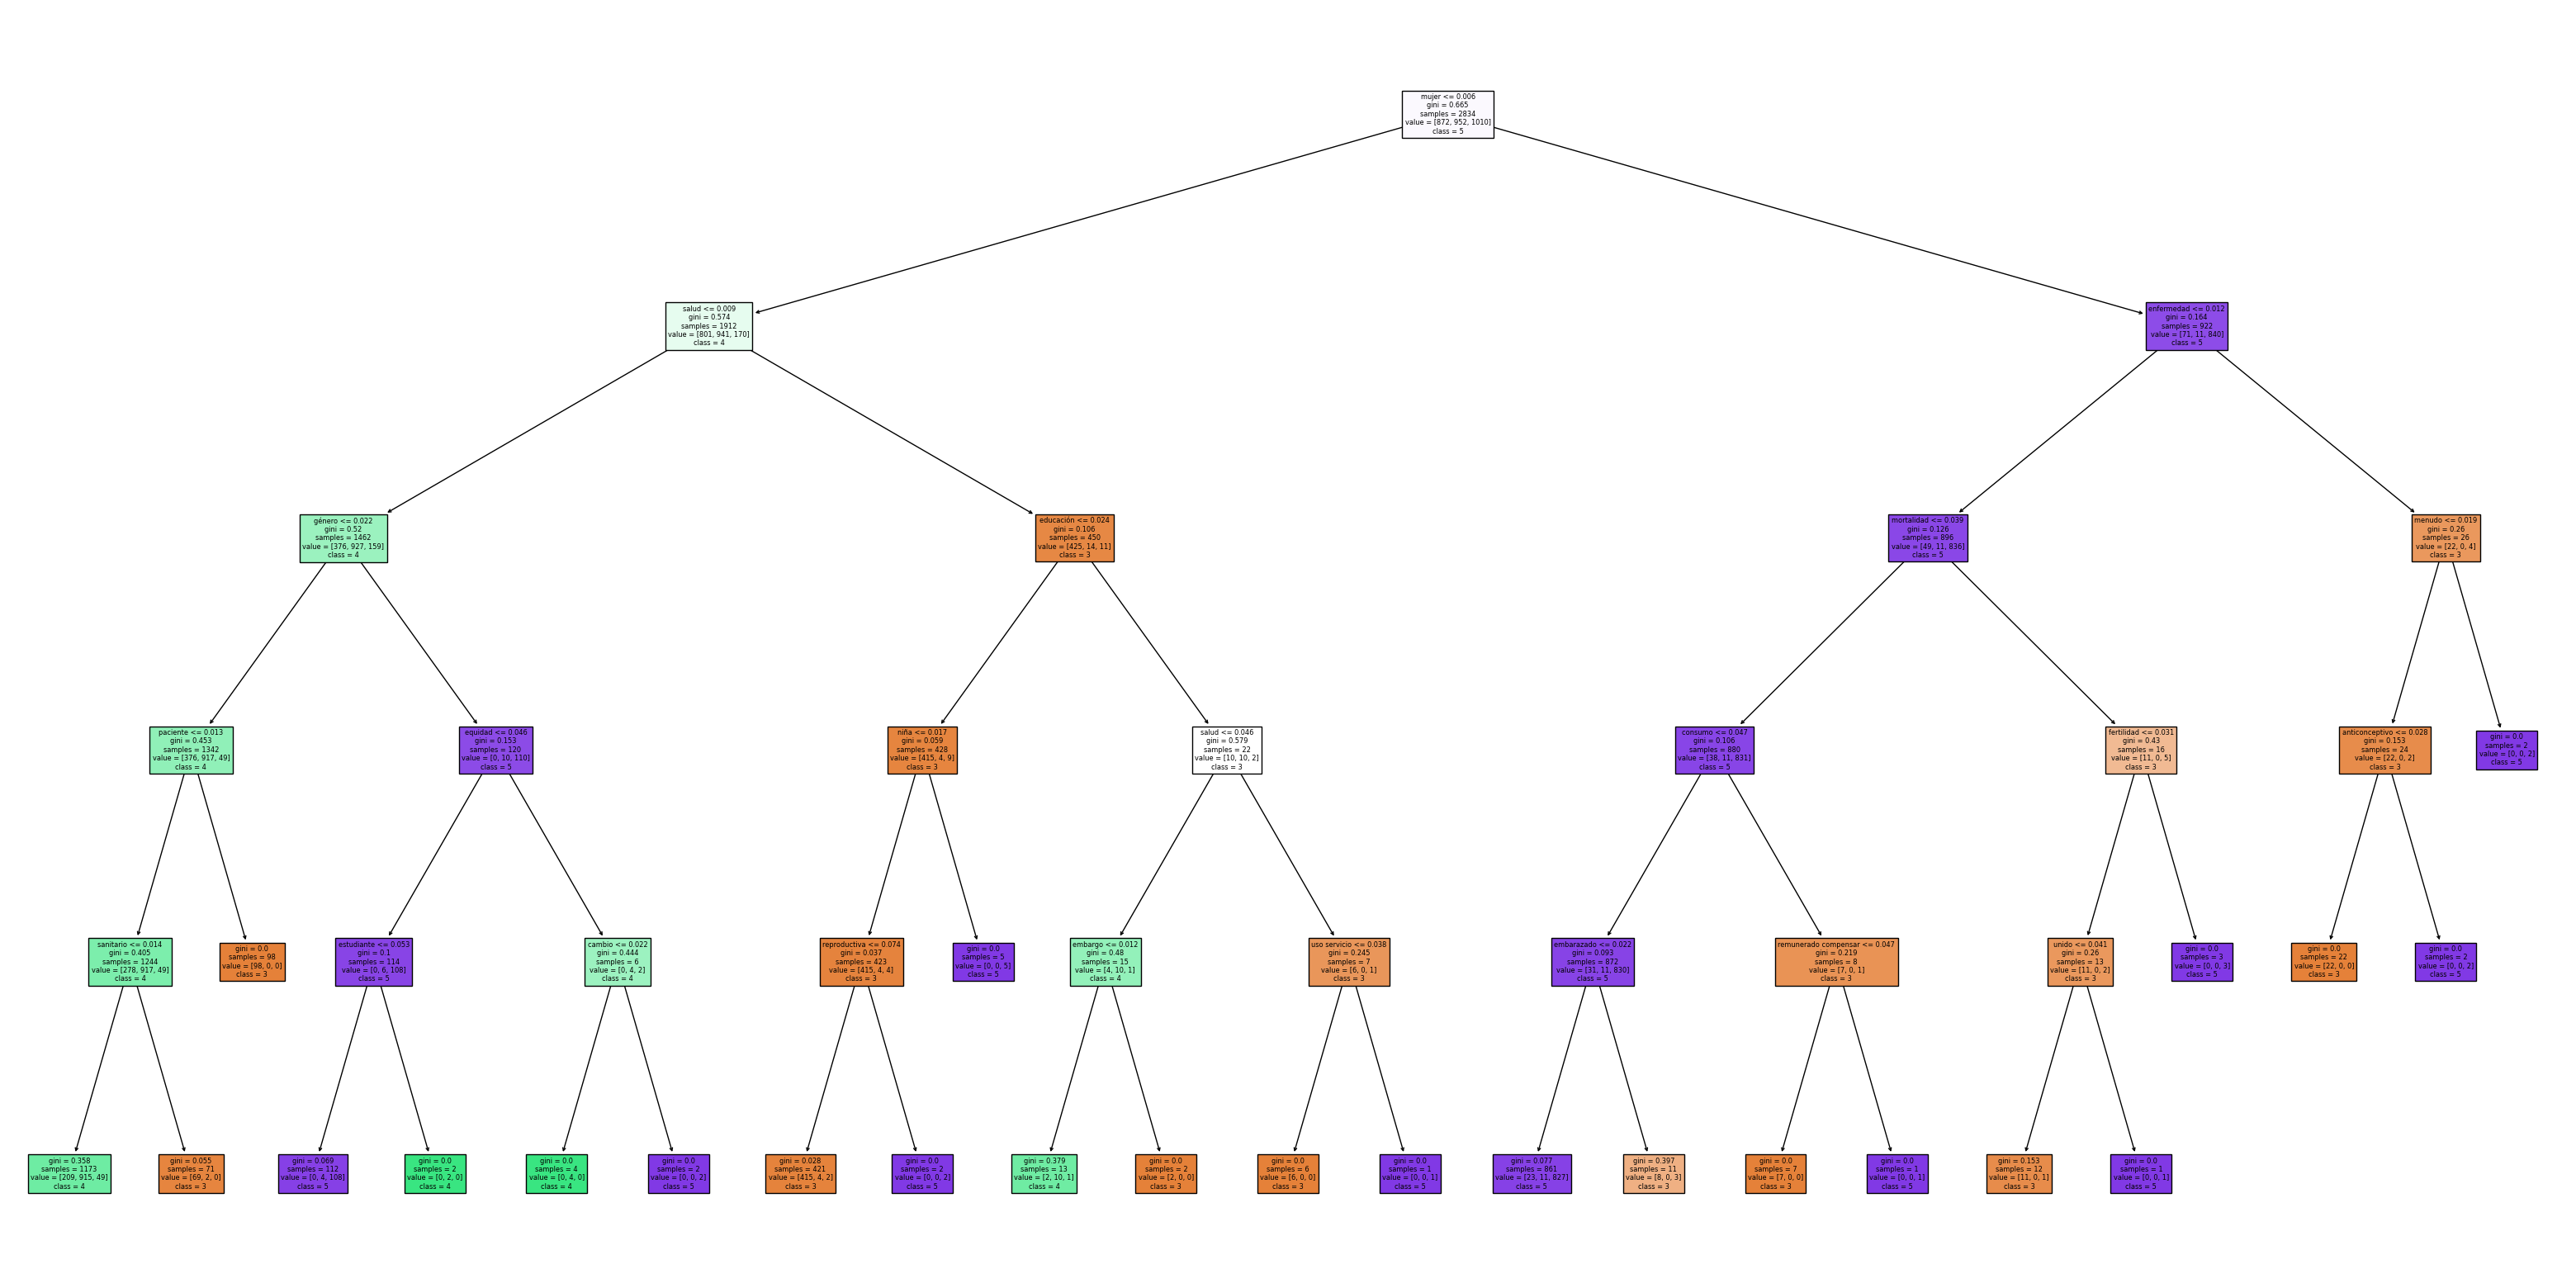

In [60]:
plt.figure(figsize=(40,20))
plot_tree(dt_model, filled=True, feature_names=vectorizer_tfidf.get_feature_names_out(), class_names=['3', '4', '5'])
plt.show()



Cuando miramos el arbol podemos ver que los datos quedaron bien divididos en clases. Algunas hojas tienen pocos elementos, lo que podria indicar que la altura del arbol es mucha o sobreajuste, pero no disminuimos la altura porque muchas otras hojas de todas las clases tienen muchos elementos.

Los principales determinantes para los ods son los siguientes
ODS 3:
Menciona pocas veces mujer, nombra bastante salud, poco educacion, poco niña, poco la palabra reproductiva.
Si no menciona mucho salud, los documentos que nombren bastante la palabra paciente o sanitario pueden coincidir con este ods.

ODS 4:
Documentos que mencionan poco la palabra mujer, poco la palabra salud, poco genero, poco paciente, y poco sanitario.

ODS 5:
Documentos que mencionen mucho mujer, poco enfermedad, poco mortalidad, poco consumo, poco embarazado.
Si un documento no menciona mucho mujer y no menciona salud pero si genero, poco la palabra equidad y estudiante entonces puede pertenecer al ods 5.

## EJECUCIÓN CON BoW

Se decidió entrenar de nuevo al modelo usando BoW y N-grams para verificar si hay algun cambio significativo.

In [62]:

dt_model = DecisionTreeClassifier(criterion='gini', max_depth=5, random_state=42)
dt_model.fit(X_train_bow, y_train)

y_train_pred = dt_model.predict(X_train_bow)
y_test_pred = dt_model.predict(X_test_bow)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred))



Training Accuracy: 0.888849682427664
Testing Accuracy: 0.8855967078189301

Training Classification Report:
               precision    recall  f1-score   support

           3       0.97      0.73      0.84       872
           4       0.78      0.97      0.87       952
           5       0.96      0.94      0.95      1010

    accuracy                           0.89      2834
   macro avg       0.91      0.88      0.89      2834
weighted avg       0.90      0.89      0.89      2834


Testing Classification Report:
               precision    recall  f1-score   support

           3       0.94      0.74      0.83       372
           4       0.79      0.96      0.87       402
           5       0.95      0.95      0.95       441

    accuracy                           0.89      1215
   macro avg       0.90      0.88      0.88      1215
weighted avg       0.90      0.89      0.88      1215



Al probar ejecutar el modelo con bow y ngrams los resultados no comabian mucho

In [64]:

print("Unique values in y_train:", sorted(np.unique(y_train)))
print("Unique values in y_test:", sorted(np.unique(y_test)))
print("Unique values in y_train_pred:", sorted(np.unique(y_train_pred)))
print("Unique values in y_test_pred:", sorted(np.unique(y_test_pred)))

Unique values in y_train: [3, 4, 5]
Unique values in y_test: [3, 4, 5]
Unique values in y_train_pred: [0, 1, 2]
Unique values in y_test_pred: [0, 1, 2]


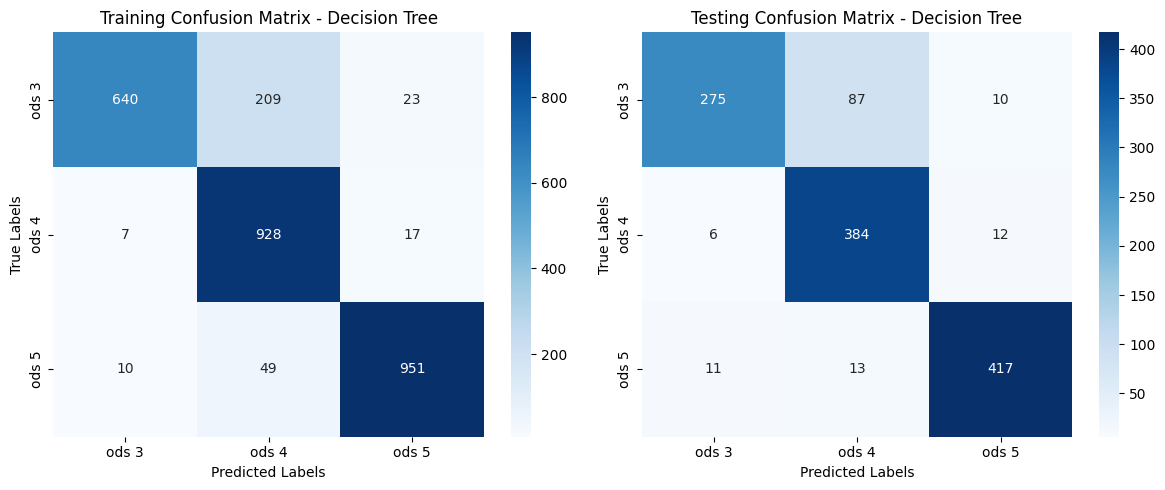

In [65]:

y_train_pred +=3
y_test_pred +=3

cm_train = confusion_matrix(y_train, y_train_pred)
cm_test = confusion_matrix(y_test, y_test_pred)

fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap para los datos de entrenamiento
sns.heatmap(cm_train, annot=True, fmt="d", cmap="Blues", ax=ax[0], xticklabels=["ods 3", "ods 4", "ods 5"], yticklabels=["ods 3", "ods 4", "ods 5"])
ax[0].set_title("Training Confusion Matrix - Decision Tree")
ax[0].set_xlabel("Predicted Labels")
ax[0].set_ylabel("True Labels")

# Heatmap para los datos de prueba
sns.heatmap(cm_test, annot=True, fmt="d", cmap="Blues", ax=ax[1], xticklabels=["ods 3", "ods 4", "ods 5"], yticklabels=["ods 3", "ods 4", "ods 5"])
ax[1].set_title("Testing Confusion Matrix - Decision Tree")
ax[1].set_xlabel("Predicted Labels")
ax[1].set_ylabel("True Labels")

plt.tight_layout()
plt.show()

podemos ver que el principal problema es que se estan predicionedo muchos datos qeu corresponden al ods 3 como ods 4.

### GridSearch

Ahora se va a realizar el gridSearch para buscar los mejores hiperparámetros y ver si hay alguna mejora en el modelo de Árboles de decisión.

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=5)
grid_search.fit(X_train_tfidf, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 5, 10, 15],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [ ]:
print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("Mejor exactitud obtenida:")
print(grid_search.best_score_)

Mejores hiperparámetros encontrados:
{'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
Mejor exactitud obtenida:
0.9304884052822804


In [ ]:
# Evaluar en el conjunto de prueba
best_model1 = grid_search.best_estimator_
y_pred = best_model1.predict(X_test_tfidf)
accuracy = best_model1.score(X_test_tfidf, y_test)
# Evaluar el modelo en el conjunto de prueba
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Precisión en el conjunto de prueba: 0.9679012345679012
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       372
           4       0.95      0.98      0.97       402
           5       0.97      0.95      0.96       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215



Como podemos ver en las métricas, el modelo mejoró notablemente, pasando de un f1-score de 0.88 a uno de 0.93

## KNN

K-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado que clasifica un punto de datos nuevo basándose en la similitud con sus 𝐾 vecinos más cercanos, según una medida de distancia, como la euclidiana. Funciona comparando el punto a predecir con los puntos de entrenamiento, sin un proceso de entrenamiento previo, y asigna la clase más común entre los vecinos o, en el caso de regresión, promedia los valores. Aunque es fácil de entender y aplicar, KNN puede ser lento con grandes conjuntos de datos y es sensible a las escalas de las características y al ruido en los datos.

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

Primero vamos a usar la represenación de BoW para hacer el modelo de KNN. En estos primeros modelos vamos a estar usando el parámetro usualmente llamado "k" (el número de vecinos) como 5.

In [69]:
# KNN con Bag of Words (BoW)
knn_bow = KNeighborsClassifier(n_neighbors=5)  
knn_bow.fit(X_train_bow, y_train)  # Entrena el modelo con los datos de entrenamiento BoW

# Predicción con el conjunto de prueba
y_pred_bow_knn_train = knn_bow.predict(X_train_bow)
y_pred_bow_knn_test = knn_bow.predict(X_test_bow)

# Evaluar el modelo
print("Training Accuracy:", accuracy_score(y_train, y_pred_bow_knn_train))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_bow_knn_test))
print("Resultados KNN con Bag of Words (BoW):")
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_bow_knn_train))
print("\nTesting Classification Report:\n", classification_report(y_test, y_pred_bow_knn_test))

Training Accuracy: 0.8405081157374735
Testing Accuracy: 0.745679012345679
Resultados KNN con Bag of Words (BoW):

Training Classification Report:
               precision    recall  f1-score   support

           3       0.93      0.77      0.85       872
           4       0.71      0.99      0.83       952
           5       0.98      0.75      0.85      1010

    accuracy                           0.84      2834
   macro avg       0.88      0.84      0.84      2834
weighted avg       0.88      0.84      0.84      2834


Testing Classification Report:
               precision    recall  f1-score   support

           3       0.86      0.56      0.68       372
           4       0.59      0.98      0.74       402
           5       0.99      0.69      0.81       441

    accuracy                           0.75      1215
   macro avg       0.81      0.74      0.74      1215
weighted avg       0.82      0.75      0.75      1215



Vemos que el accuracy del modelo aún así es algo bajo, veamos que pasa si usamos la representación de TF-IDF

In [70]:
# KNN con TF-IDF
knn_tfidf = KNeighborsClassifier(n_neighbors=5)  # Elige el número de vecinos (puedes ajustar este parámetro)
knn_tfidf.fit(X_train_tfidf, y_train)  # Entrena el modelo con los datos de entrenamiento TF-IDF

# Predicción con el conjunto de prueba
y_pred_tfidf_knn = knn_tfidf.predict(X_test_tfidf)

# Evaluar el modelo
print("Resultados KNN con TF-IDF:")
print(classification_report(y_test, y_pred_tfidf_knn))
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_tfidf_knn))

Resultados KNN con TF-IDF:
              precision    recall  f1-score   support

           3       0.93      0.97      0.94       372
           4       0.96      0.94      0.95       402
           5       0.95      0.93      0.94       441

    accuracy                           0.95      1215
   macro avg       0.95      0.95      0.95      1215
weighted avg       0.95      0.95      0.95      1215

Exactitud (accuracy): 0.9465020576131687


Vemos que al utilizar la versión de TF IDF mejora bastante la precisión del modelo. Se demora un poco más en hacer la predicción del modelo. Sin embargo, en muchos casos, es recomendable escalar los datos antes de usar KNN, ya que este algoritmo se basa en distancias y las características con valores más grandes pueden dominar el cálculo de distancia. Vamos a hacer el escalado para ambos grupos de datos y ver si mejoran los modelos generados. Este proceso de escalado asegura que todas las características estén en una escala comparable. 

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean=False)  # No usamos with_mean=False para datos dispersos como BoW o TF-IDF

# Escalar BoW
X_train_bow_scaled = scaler.fit_transform(X_train_bow)
X_test_bow_scaled = scaler.transform(X_test_bow)

# Escalar TF-IDF
X_train_tfidf_scaled = scaler.fit_transform(X_train_tfidf)
X_test_tfidf_scaled = scaler.transform(X_test_tfidf)


Modelo con BoW escalando los datos:

In [73]:
# KNN con Bag of Words (BoW)
knn_bow_scaled = KNeighborsClassifier(n_neighbors=5)  # Elige el número de vecinos (por defecto 5)
knn_bow_scaled.fit(X_train_bow_scaled, y_train)  # Entrena el modelo con los datos de entrenamiento BoW

# Predicción con el conjunto de prueba
y_pred_bow_knn_train_scaled = knn_bow_scaled.predict(X_train_bow_scaled)
y_pred_bow_knn_test_scaled = knn_bow_scaled.predict(X_test_bow_scaled)

# Evaluar el modelo
print("Training Accuracy:", accuracy_score(y_train, y_pred_bow_knn_train_scaled))
print("Testing Accuracy:", accuracy_score(y_test, y_pred_bow_knn_test_scaled))
print("Resultados KNN con Bag of Words (BoW):")
print("\nTraining Classification Report:\n", classification_report(y_train, y_pred_bow_knn_train_scaled))
print("\nTesting Classification Report:\n", classification_report(y_test, y_pred_bow_knn_test_scaled))

Training Accuracy: 0.3366266760762174
Testing Accuracy: 0.3308641975308642
Resultados KNN con Bag of Words (BoW):

Training Classification Report:
               precision    recall  f1-score   support

           3       1.00      0.00      0.00       872
           4       0.34      1.00      0.50       952
           5       0.00      0.00      0.00      1010

    accuracy                           0.34      2834
   macro avg       0.45      0.33      0.17      2834
weighted avg       0.42      0.34      0.17      2834


Testing Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00       372
           4       0.33      1.00      0.50       402
           5       0.00      0.00      0.00       441

    accuracy                           0.33      1215
   macro avg       0.11      0.33      0.17      1215
weighted avg       0.11      0.33      0.16      1215



C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.p

Parece que el escalado de los datos empeoró la versión utilizando BoW. Veamos que sucede con la versión de TF-DIF con el escalado de datos:

In [74]:
# KNN con TF-IDF escalado
knn_tfidf_scaled = KNeighborsClassifier(n_neighbors=5)  # Puedes ajustar el número de vecinos
knn_tfidf_scaled.fit(X_train_tfidf_scaled, y_train)  # Entrena el modelo con los datos de entrenamiento escalados

# Predicción con el conjunto de prueba
y_pred_tfidf_knn_scaled = knn_tfidf_scaled.predict(X_test_tfidf_scaled)

# Evaluar el modelo
print("Resultados KNN con TF-IDF escalado:")
print(classification_report(y_test, y_pred_tfidf_knn_scaled))
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_tfidf_knn_scaled))

Resultados KNN con TF-IDF escalado:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00       372
           4       0.33      1.00      0.50       402
           5       0.00      0.00      0.00       441

    accuracy                           0.33      1215
   macro avg       0.11      0.33      0.17      1215
weighted avg       0.11      0.33      0.16      1215

Exactitud (accuracy): 0.3308641975308642


C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.p

Al parecer el escalado de los datos empeoró la predicción de modelo en general. ¿Por qué puede estar sucediendo esto? Puede ser que los datos ya se encuentran en una escala específica de la cual KNN se beneficia. Quizá otro tipo de algoritmo se pueda beneficiar de este esaclado, pero en este caso KNN no lo hace. Vemos también que en los resultados de correr los modelos entrandos con los datos escalados aparece este mensaje de advertencia (UndefinedMetricWarning), esto indica que la precisión (precision) y la puntuación F1 (f1-score) no están bien definidas para algunas clases en el modelo, porque no se han hecho predicciones para esas clases. En otras palabras, el modelo no predijo ninguna muestra como perteneciente a ciertas categorías (clases), lo que provoca que las métricas como la precisión y la F1 sean indefinidas para esas clases. Confirmando nuevamente que nuestro modelo no se beneficia del escalado de los datos. 

Siguindo con la idea de mejorar el modelo, ahora intentaremos usar GridSearch para encontrar el mejor valor de vecinos, es decir, el que mejore el valor de accuracy del modelo y de esta manera deberiamos ser capaces de mejorar el modelo en general.

In [75]:
from sklearn.model_selection import GridSearchCV
# Definir los parámetros para ajustar
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}  # Prueba con diferentes valores de vecinos

# Usar GridSearchCV para encontrar el mejor número de vecinos
grid_knn_bow = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn_bow.fit(X_train_bow, y_train)

# Imprimir el mejor número de vecinos encontrado
print("Mejor número de vecinos:", grid_knn_bow.best_params_)

# Predicción y evaluación del mejor modelo
best_knn_bow = grid_knn_bow.best_estimator_
y_pred_best_knn_bow = best_knn_bow.predict(X_test_bow)

print("Resultados KNN con BoW no escalado:")
print(classification_report(y_test, y_pred_best_knn_bow))
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_best_knn_bow))

Mejor número de vecinos: {'n_neighbors': 7}
Resultados KNN con BoW no escalado:
              precision    recall  f1-score   support

           3       0.93      0.47      0.63       372
           4       0.57      0.98      0.72       402
           5       0.98      0.75      0.85       441

    accuracy                           0.74      1215
   macro avg       0.83      0.73      0.73      1215
weighted avg       0.83      0.74      0.74      1215

Exactitud (accuracy): 0.7407407407407407


Aquí parece ser que no se logró mejorar la accuracy, de hecho, el valor es menor a la que teníamos con el número de vecinos igual a 5. ¿Por qué cambió el valor entonces? Esto sucede porque gridSearch hace una Validación cruzada, es decir, para cada valor de n_neighbors, GridSearchCV divide los datos de entrenamiento en varias particiones (folds). El modelo se entrena en algunas particiones y se valida en otras. Este proceso se repite para cada valor de n_neighbors y para cada fold, calculando la métrica de evaluación (en este caso, exactitud o accuracy). Eso quiere decir que este número de vecinos (7) es el que mejores resultados tiene al hacer el promedio de aplicar el modelo con cada número de vecinos con distintas distribuciones de los datos. 

Ahora pasemos a usar GridSearch con los datos en representación TF-IDF

In [76]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para ajustar
param_grid = {'n_neighbors': [3, 5, 7, 9, 11, 13, 15]}  # Prueba con diferentes valores de vecinos

# Usar GridSearchCV para encontrar el mejor número de vecinos
grid_knn_no_scaled = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy')
grid_knn_no_scaled.fit(X_train_tfidf, y_train)

# Imprimir el mejor número de vecinos encontrado
print("Mejor número de vecinos:", grid_knn_no_scaled.best_params_)

# Predicción y evaluación del mejor modelo
best_knn_no_scaled = grid_knn_no_scaled.best_estimator_
y_pred_best_knn_no_scaled = best_knn_no_scaled.predict(X_test_tfidf)

print("Resultados KNN con TF-IDF no escalado:")
print(classification_report(y_test, y_pred_best_knn_no_scaled))
print("Exactitud (accuracy):", accuracy_score(y_test, y_pred_best_knn_no_scaled))


Mejor número de vecinos: {'n_neighbors': 15}
Resultados KNN con TF-IDF no escalado:
              precision    recall  f1-score   support

           3       0.96      0.97      0.97       372
           4       0.98      0.97      0.98       402
           5       0.97      0.96      0.97       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215

Exactitud (accuracy): 0.9695473251028807


Parece que el mejor número de vecinos en este caso sería 15, lo cual mejora un poco nuestro modelo, que ahora tiene una presición de 97% aproximadamente. Los valores de precisión, reacall y f1-score son muy buenos para cada uno de los grupos, con lo cual concluimos que este sería el mejor modelo utilizando KNN. 

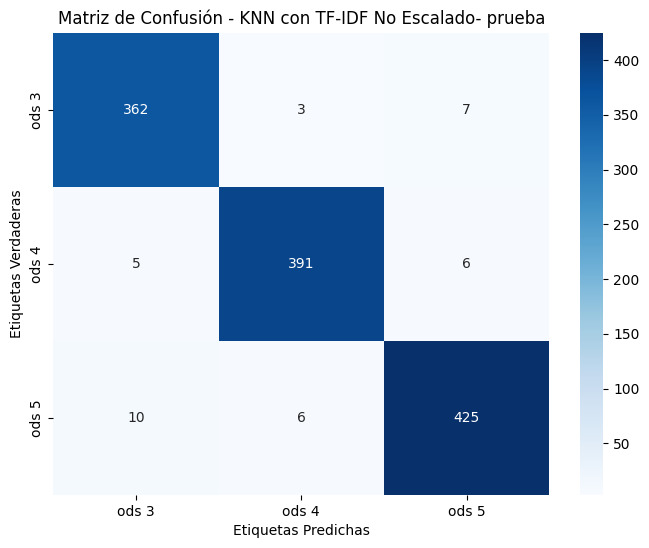

In [78]:
cm = confusion_matrix(y_test, y_pred_best_knn_no_scaled)

# Crear el heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["ods 3", "ods 4", "ods 5"], yticklabels=["ods 3", "ods 4", "ods 5"])
plt.title("Matriz de Confusión - KNN con TF-IDF No Escalado- prueba")
plt.xlabel("Etiquetas Predichas")
plt.ylabel("Etiquetas Verdaderas")
plt.show()


## Random forest

In [79]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo usando el conjunto de entrenamiento con TF-IDF
rf_model.fit(X_train_tfidf, y_train)

# Realizar predicciones en el conjunto de entrenamiento y de prueba
y_train_pred_rf = rf_model.predict(X_train_tfidf)
y_test_pred_rf = rf_model.predict(X_test_tfidf)

# Calcular y mostrar la precisión de entrenamiento y de prueba
print("Training Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred_rf))

# Mostrar informes de clasificación
print("\nTraining Classification Report:\n", classification_report(y_train, y_train_pred_rf))
print("\nTesting Classification Report:\n", classification_report(y_test, y_test_pred_rf))

Training Accuracy: 1.0
Testing Accuracy: 0.9637860082304527

Training Classification Report:
               precision    recall  f1-score   support

           3       1.00      1.00      1.00       872
           4       1.00      1.00      1.00       952
           5       1.00      1.00      1.00      1010

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834


Testing Classification Report:
               precision    recall  f1-score   support

           3       0.98      0.97      0.97       372
           4       0.94      0.98      0.96       402
           5       0.97      0.95      0.96       441

    accuracy                           0.96      1215
   macro avg       0.96      0.96      0.96      1215
weighted avg       0.96      0.96      0.96      1215



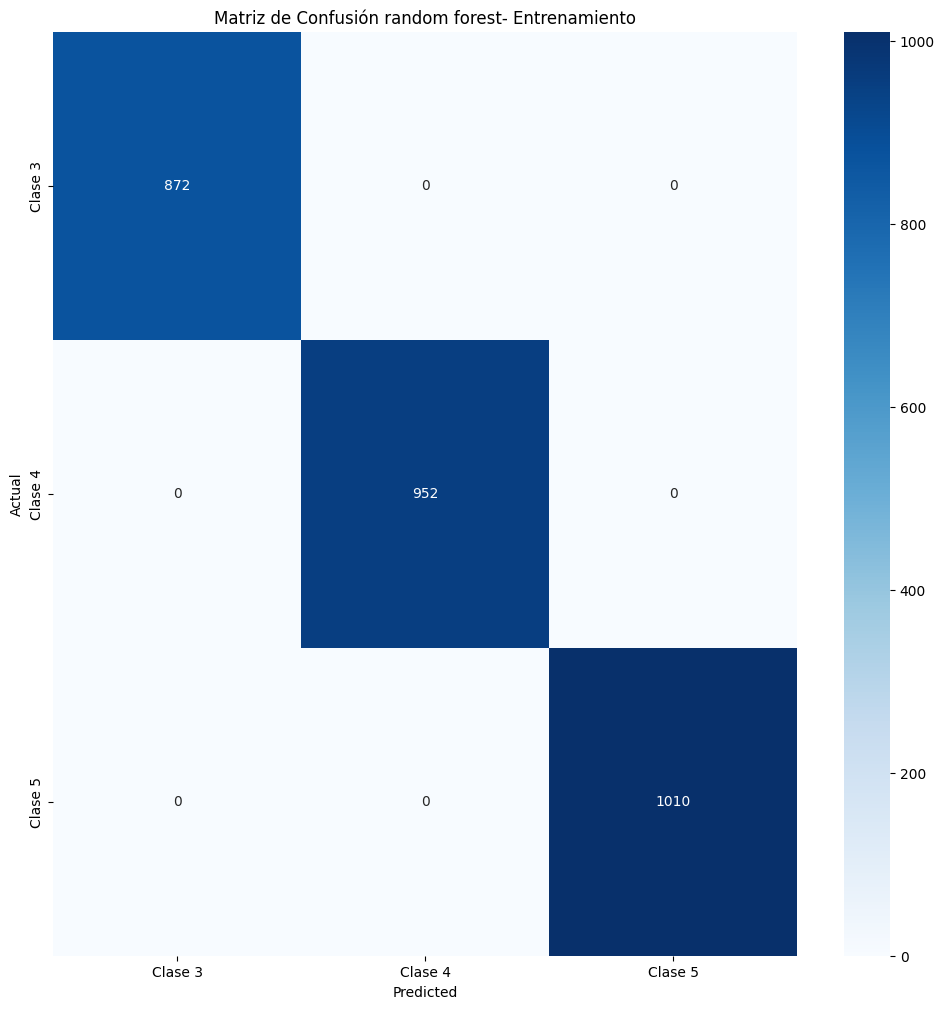

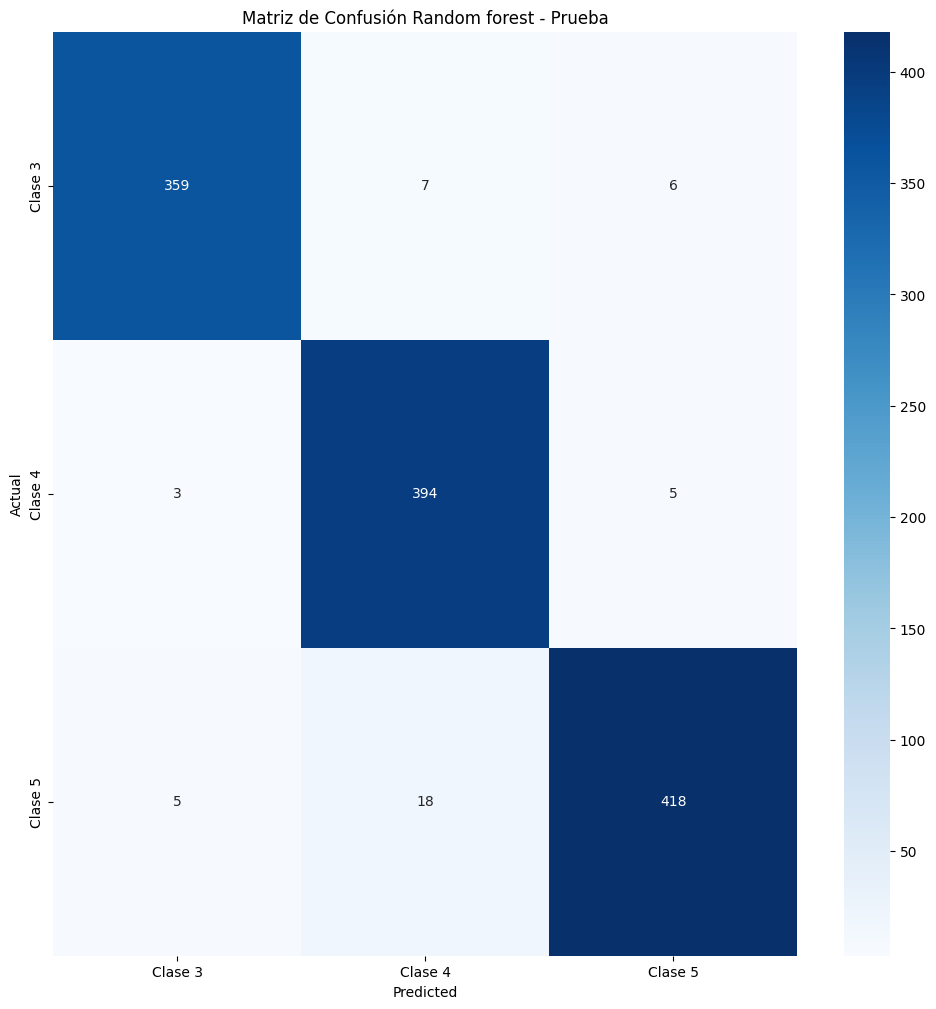

In [80]:
from sklearn.metrics import confusion_matrix

train_cm = confusion_matrix(y_train, y_train_pred_rf)
test_cm = confusion_matrix(y_test, y_test_pred_rf)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Etiquetas de las clases
labels = ['Clase 3', 'Clase 4', 'Clase 5']

# Graficar matriz de confusión para entrenamiento y prueba
plot_confusion_matrix(train_cm, labels, 'Matriz de Confusión random forest- Entrenamiento')
plot_confusion_matrix(test_cm, labels, 'Matriz de Confusión Random forest - Prueba')

### GridSearch

Ahora se va a realizar el GridSearch para buscar los mejores hiperparámetros y ver si hay alguna mejora en el modelo de Random Forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_gridRF = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}



In [85]:
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_gridRF, cv=5, scoring='accuracy', n_jobs=-1, verbose=2)
grid_search.fit(X_train_tfidf, y_train)

print("Mejores hiperparámetros encontrados:")
print(grid_search.best_params_)

print("\nMejor score obtenido:")
print(grid_search.best_score_)


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Mejores hiperparámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}

Mejor score obtenido:
0.9710664896766193


In [86]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_tfidf)
accuracy = best_model.score(X_test_tfidf, y_test)
# Evaluar el modelo en el conjunto de prueba
print("Precisión en el conjunto de prueba:", accuracy_score(y_test, y_pred))

# Generar y mostrar el reporte de clasificación
report = classification_report(y_test, y_pred)
print("Reporte de Clasificación:")
print(report)

Precisión en el conjunto de prueba: 0.9679012345679012
Reporte de Clasificación:
              precision    recall  f1-score   support

           3       0.98      0.97      0.97       372
           4       0.95      0.98      0.97       402
           5       0.97      0.95      0.96       441

    accuracy                           0.97      1215
   macro avg       0.97      0.97      0.97      1215
weighted avg       0.97      0.97      0.97      1215



En este caso vemos como los resultados mejoran aún mas las métricas de Random Forest que de por si ya eran buenas.

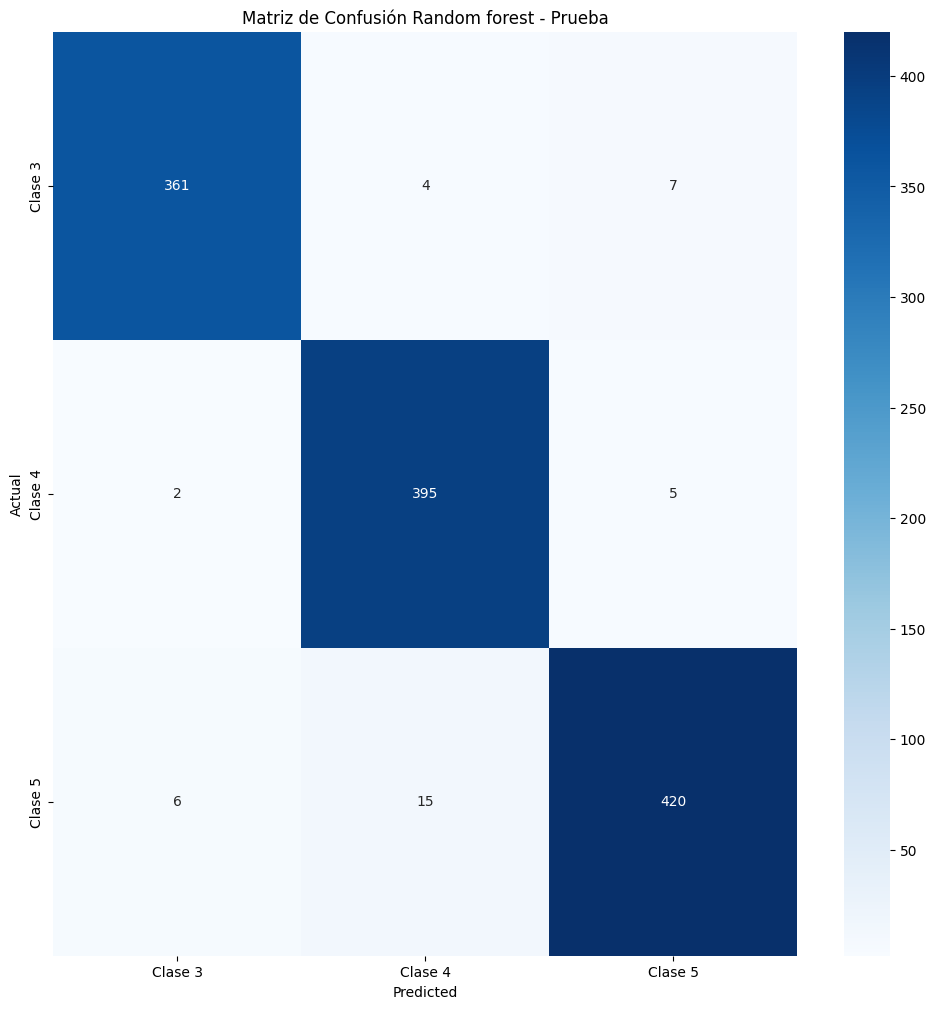

In [87]:
from sklearn.metrics import confusion_matrix


test_cm = confusion_matrix(y_test, y_pred)

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(12,12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Etiquetas de las clases
labels = ['Clase 3', 'Clase 4', 'Clase 5']


plot_confusion_matrix(test_cm, labels, 'Matriz de Confusión Random forest - Prueba')

## Red neuronal estandar


En la red neuronal estandar estamos usando los hiperparametros de 3 capas de neuronas, la primera de 128, segunda de 64 y finalmente de 3. Cada una usa relu como función de activación y la ultima capa tiene softmax. Esto se hace para permitir la clasificacion. Esencialmente cada neurona hace una regresión lineal con los parametros que llegan de la capa anterior y luego aplica una funcion no linear. La ultima capa debe usar softmax porque asi, cada regresion de cada neurona de la ultima capa se transforma en un numero de 0 a 1, representando la probabilidad de que el dato pertenezca a una determinada clase. Son 3 neuronas en la ultima capa porque cada una tiene como output la probabilidad de que el dato corresponda a cada una de las 3 clases (ods 3 4 y 5). Además como función de perdida se uso spase categorical crossentropy, que calcula el error entre las clases predichas por el modelo y las etiquetas reales. Finalmente señalamos que usamos dropout entre cada capa con el 50% de probabilidad de que un input no llegue la siguiente neurona. Esto se hace para evitar el sobreajuste.

In [ ]:
# Ajustar etiquetas
y_train_adj = y_train - 3
y_test_adj = y_test - 3


# Dimensiones de entrada basadas en el tamaño del vocabulario del vectorizador TF-IDF
input_dim = X_train_tfidf.shape[1]

# Crear el modelo
model = Sequential()
model.add(Dense(128, input_dim=input_dim, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))  # Actualización para 3 clases

# Compilar el modelo
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_tfidf, y_train_adj,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test_tfidf, y_test_adj),
                    batch_size=4)

# Evaluar el modelo
loss, accuracy = model.evaluate(X_test_tfidf, y_test_adj, verbose=0)
print("\nTesting Accuracy:", accuracy)

C:\Users\USUARIO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 145s 203ms/step - accuracy: 0.6726 - loss: 0.7663 - val_accuracy: 0.9819 - val_loss: 0.0581
Epoch 2/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 144s 203ms/step - accuracy: 0.9970 - loss: 0.0140 - val_accuracy: 0.9794 - val_loss: 0.0671
Epoch 3/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 145s 205ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9802 - val_loss: 0.0616
Epoch 4/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 149s 210ms/step - accuracy: 1.0000 - loss: 9.5556e-04 - val_accuracy: 0.9811 - val_loss: 0.0720
Epoch 5/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 146s 206ms/step - accuracy: 1.0000 - loss: 8.0478e-04 - val_accuracy: 0.9811 - val_loss: 0.0715
Epoch 6/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 147s 207ms/step - accuracy: 1.0000 - loss: 2.4244e-04 - val_accuracy: 0.9802 - val_loss: 0.0701
Epoch 7/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 145s 204ms/step - accuracy: 1.0000 - loss: 1.5547e-04 - val_accuracy: 0.9802 - val_loss: 0.0738
Epoch 8/10
709/709 ━━━━━━━━━━━━━━━━━━━━ 146s 205ms/step - ac

In [ ]:
y_train_pred = model.predict(X_train_tfidf)
y_test_pred = model.predict(X_test_tfidf)

# Convertir las predicciones de probabilidades a etiquetas
y_train_pred = y_train_pred.argmax(axis=1)
y_test_pred = y_test_pred.argmax(axis=1)

# Reportes de clasificación para entrenamiento y prueba
train_report = classification_report(y_train_adj, y_train_pred, target_names=['Clase 3', 'Clase 4', 'Clase 5'])
test_report = classification_report(y_test_adj, y_test_pred, target_names=['Clase 3', 'Clase 4', 'Clase 5'])

print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)

89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
Training Classification Report:
               precision    recall  f1-score   support

     Clase 3       1.00      1.00      1.00       872
     Clase 4       1.00      1.00      1.00       952
     Clase 5       1.00      1.00      1.00      1010

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834

Testing Classification Report:
               precision    recall  f1-score   support

     Clase 3       0.98      0.99      0.99       372
     Clase 4       0.97      0.99      0.98       402
     Clase 5       1.00      0.96      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



In [88]:
def preprocess_text(texto):
    # Corregir caracteres
    texto, _ = corregir_caracteres(texto)

    # Eliminar palabras consecutivas
    texto, _ = eliminar_consecutivas(texto)

    # Ajustar texto (números y otros caracteres)
    texto = ajustar_texto(texto)

    # Procesar el texto: Tokenización y eliminación de stopwords
    tokens = procesar_texto(texto)

    # Lematizar los tokens
    lemas = lematizar_tokens(tokens)

    # Unir lemas en una sola cadena
    texto_lemas = ' '.join(lemas)

    return texto_lemas

# PRUEBA el modelo!

In [ ]:

opinion_3 = "El principal instrumento de medición, el Adult Mental Health Benchmarking Toolkit, presenta indicadores de resultados en formato de cuadro de mando, combinando indicadores estructurales, de proceso y de resultados. Por lo general, se entiende que los trastornos leves a moderados (como la depresión y la ansiedad) no requieren tratamientos altamente especializados administrados por psiquiatras o en régimen de hospitalización en la gran mayoría de los casos. Por el contrario, requieren una sólida atención primaria y comunitaria. Aunque la atención primaria es, en la inmensa mayoría de los casos, el primer punto al que acuden las personas que sufren trastornos mentales, los médicos de atención primaria no siempre disponen de las competencias y opciones de tratamiento adecuadas para responder eficazmente a las necesidades.  "
opinion_4 ="La educación inclusiva y equitativa es fundamental para alcanzar el desarrollo sostenible. Debemos asegurar que cada niño, sin importar su condición socioeconómica, tenga acceso a educación de calidad. Esto incluye mejorar infraestructuras educativas, formar adecuadamente a los docentes y promover oportunidades de aprendizaje permanente para todos"
opinion_5 = "El empoderamiento de las mujeres es esencial para el desarrollo económico y social de nuestras comunidades. Garantizar la igualdad de acceso a oportunidades laborales y educativas para las mujeres y niñas no solo es una cuestión de justicia social, sino también una estrategia clave para promover el crecimiento económico sostenible. Es fundamental eliminar las barreras que enfrentan las mujeres en todos los sectores para asegurar su participación plena y efectiva en todos los ámbitos de la sociedad."

opinion_51 = "los lugares de descanso se convirtieron en un lugar dificil para las medicas y enfermeras. Los roles de genero generaban una coyuntura entre las relaciones de las personas de diferentes sexos"

opinion_31 ="Sin embargo, la prevalencia de niños de 0 a 6 meses con bajo peso aumentó del 6,9% en 2005 al 8,4% en 2010. En 2014, el bajo peso al nacer era más frecuente en las zonas rurales (sobre todo en la región occidental, con un 6,6%) que en las urbanas (3,8% en Ulán Bator). En 1997, el Gobierno aprobó una primera lista de productos químicos tóxicos y peligrosos prohibidos y de uso limitado. "
processed_opinion = preprocess_text(opinion_31)  # Replace 'preprocess_text' with your actual preprocessing function



# Ajustar las opciones de impresión para evitar la notación científica
np.set_printoptions(suppress=True, precision=4)  #  4 decimales

# Vectorize the opinion
vectorized_opinion = vectorizer_tfidf.transform([processed_opinion])

# Make the prediction
predicted_class = model.predict(vectorized_opinion)


# Print the predicted class
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
Predicted class: [[1. 0. 0.]]


Cada elemento es la probabilidad que la opinion pertenezca a esa clase. por ejemplo un valor cercaono a 1 en la primera posicion diria que el modelo predice que que la opinion es de la primera clase, o sea osd 3

In [ ]:
import joblib

# Guardar el modelo
#joblib.dump(dt_model, 'decision_tree_model.pkl')

In [ ]:
model.save('mi_modelo.h5')


In [91]:

from tensorflow.keras.models import load_model

modeloo = load_model('mi_modelo.h5')

In [93]:
y_train_adj = y_train - 3
y_test_adj = y_test - 3

In [94]:
y_train_pred = modeloo.predict(X_train_tfidf)
y_test_pred = modeloo.predict(X_test_tfidf)

# Convertir las predicciones de probabilidades a etiquetas
y_train_pred = y_train_pred.argmax(axis=1)
y_test_pred = y_test_pred.argmax(axis=1)

# Reportes de clasificación para entrenamiento y prueba
train_report = classification_report(y_train_adj, y_train_pred, target_names=['Clase 3', 'Clase 4', 'Clase 5'])
test_report = classification_report(y_test_adj, y_test_pred, target_names=['Clase 3', 'Clase 4', 'Clase 5'])

print("Training Classification Report:\n", train_report)
print("Testing Classification Report:\n", test_report)

89/89 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Training Classification Report:
               precision    recall  f1-score   support

     Clase 3       1.00      1.00      1.00       872
     Clase 4       1.00      1.00      1.00       952
     Clase 5       1.00      1.00      1.00      1010

    accuracy                           1.00      2834
   macro avg       1.00      1.00      1.00      2834
weighted avg       1.00      1.00      1.00      2834

Testing Classification Report:
               precision    recall  f1-score   support

     Clase 3       0.98      0.99      0.99       372
     Clase 4       0.97      0.99      0.98       402
     Clase 5       1.00      0.96      0.98       441

    accuracy                           0.98      1215
   macro avg       0.98      0.98      0.98      1215
weighted avg       0.98      0.98      0.98      1215



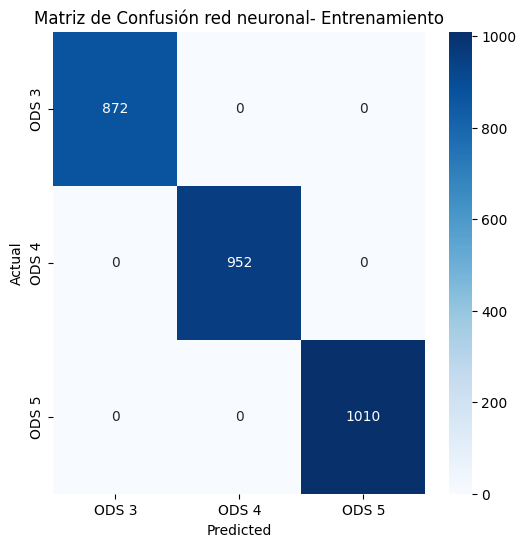

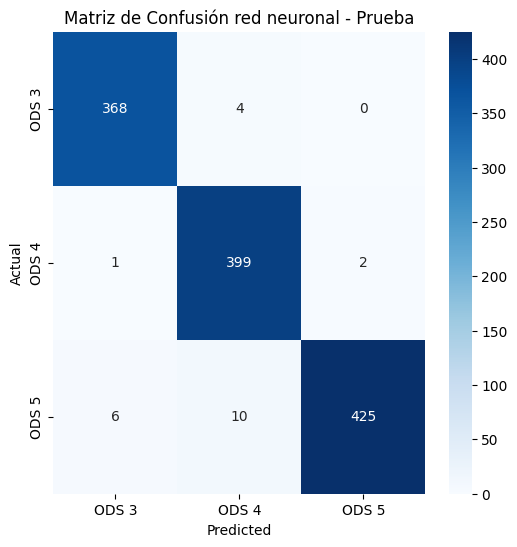

In [95]:

# Ajustar las predicciones para que estén en el mismo rango que las etiquetas reales
y_train_pred_adjusted = y_train_pred + 3
y_test_pred_adjusted = y_test_pred + 3

# Matriz de confusión para el conjunto de entrenamiento y prueba
train_cm = confusion_matrix(y_train, y_train_pred_adjusted, labels=[3, 4, 5])
test_cm = confusion_matrix(y_test, y_test_pred_adjusted, labels=[3, 4, 5])

# Función para graficar la matriz de confusión
def plot_confusion_matrix(cm, labels, title):
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Etiquetas de las clases
labels = ['ODS 3', 'ODS 4', 'ODS 5']

# Graficar matriz de confusión para entrenamiento y prueba
plot_confusion_matrix(train_cm, labels, 'Matriz de Confusión red neuronal- Entrenamiento')
plot_confusion_matrix(test_cm, labels, 'Matriz de Confusión red neuronal - Prueba')

podemos ver que las metricas obtenidas con este modelo son las mejores, incluso que otras obtenidas con knn, dt  o rf. por lo tanto este va a ser el modelo elegido para construir el csv con predicciones.

# CSV

In [101]:

test = pd.read_excel('TestODScat_345.xlsx')

# Asegurarse de que las opciones de impresión estén configuradas correctamente
np.set_printoptions(suppress=True, precision=4)

# Suponiendo que la columna con las opiniones se llama 'opinion'
def make_prediction(opinion):
    # Preprocesar la opinión
    processed_opinion = preprocess_text(opinion)
    
    # Vectorizar la opinión
    vectorized_opinion = vectorizer_tfidf.transform([processed_opinion])
    
    # Realizar la predicción
    predicted_class = modeloo.predict(vectorized_opinion).argmax(axis=1)+3


    # Devolver la predicción como valor plano
    return predicted_class[0]

# Crear una nueva columna de predicciones en el DataFrame
test['Prediccion'] = test['Textos_espanol'].apply(make_prediction)

# Guardar el archivo con las predicciones
test.to_excel('TestODScat_345_con_predicciones.xlsx', index=False)

print("Predicciones agregadas y archivo guardado como 'TestODScat_345_con_predicciones.xlsx'")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━